# Question:

Regression: Simple Linear 

Dataset: advertising.csv

Apply Data pre-processing (Label Encoding , Data Transformation….) 

techniques if necessary.

Explore whether TV advertising spending can predict the number of sales for 

the product. Also display the regression results and plot the

regression line.

frequency : 3

# Importing Libraries 

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing Dataset

In [73]:
dataset = pd.read_csv("advertising.csv")

In [74]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [75]:
dataset.shape

(200, 4)

In [77]:
correlation_matrix = dataset.corr()['Sales'].abs()

# Display the correlation values in descending order
sorted_correlation = correlation_matrix.sort_values(ascending=False)

In [78]:
dataset

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


### For Simple Linear Regression

In [ ]:
TV = dataset.iloc[:,2:3].values
sales = dataset.iloc[:,-1].values

In [ ]:
TV

array([[ 69.2],
       [ 45.1],
       [ 69.3],
       [ 58.5],
       [ 58.4],
       [ 75. ],
       [ 23.5],
       [ 11.6],
       [  1. ],
       [ 21.2],
       [ 24.2],
       [  4. ],
       [ 65.9],
       [  7.2],
       [ 46. ],
       [ 52.9],
       [114. ],
       [ 55.8],
       [ 18.3],
       [ 19.1],
       [ 53.4],
       [ 23.5],
       [ 49.6],
       [ 26.2],
       [ 18.3],
       [ 19.5],
       [ 12.6],
       [ 22.9],
       [ 22.9],
       [ 40.8],
       [ 43.2],
       [ 38.6],
       [ 30. ],
       [  0.3],
       [  7.4],
       [  8.5],
       [  5. ],
       [ 45.7],
       [ 35.1],
       [ 32. ],
       [ 31.6],
       [ 38.7],
       [  1.8],
       [ 26.4],
       [ 43.3],
       [ 31.5],
       [ 35.7],
       [ 18.5],
       [ 49.9],
       [ 36.8],
       [ 34.6],
       [  3.6],
       [ 39.6],
       [ 58.7],
       [ 15.9],
       [ 60. ],
       [ 41.4],
       [ 16.6],
       [ 37.7],
       [  9.3],
       [ 21.4],
       [ 54.7],
       [

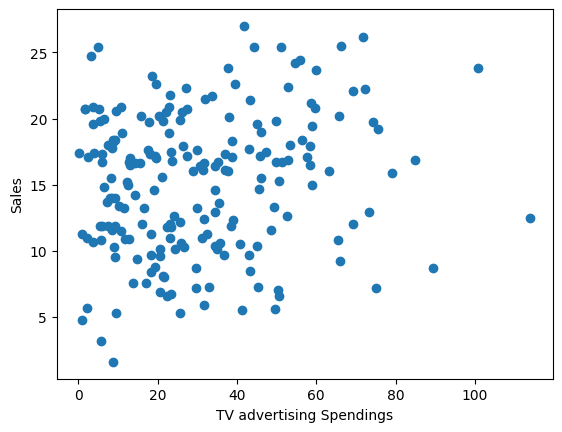

In [ ]:
plt.scatter(TV,sales)
plt.xlabel('TV advertising Spendings')
plt.ylabel('Sales')
plt.show()

### For Multiple Linear Regression

In [ ]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

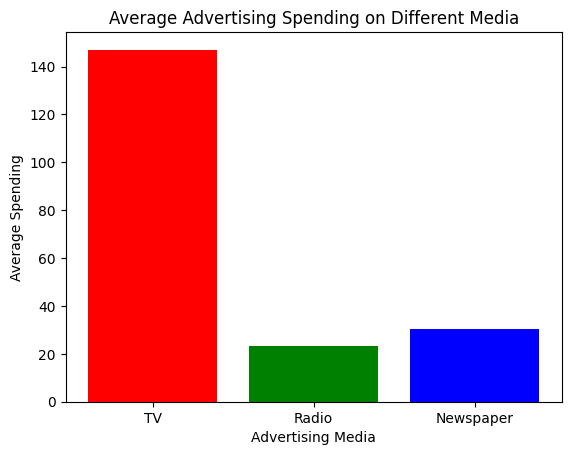

In [ ]:
# Extract data for TV, Radio, and Newspaper spending
advertising_media = ['TV', 'Radio', 'Newspaper']
spending = [dataset['TV'].mean(), dataset['Radio'].mean(), dataset['Newspaper'].mean()]

# Plotting the bar graph
plt.bar(advertising_media, spending, color=['red', 'green', 'blue'])
plt.title('Average Advertising Spending on Different Media')
plt.xlabel('Advertising Media')
plt.ylabel('Average Spending')
plt.show()

## Spliting Dataset 

In [ ]:
from sklearn.model_selection import train_test_split

### For Simple Linear Regression

In [ ]:
TV_train , TV_test , S_train , S_test = train_test_split(TV,sales,random_state=0,train_size=0.8)

In [ ]:
TV_train.shape

(160, 1)

In [ ]:
S_train.shape

(160,)

### For Multiple Linear Regression 

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,random_state=0,test_size=0.2)

## Training the Simple Linear Regression Model on the Training set

In [ ]:
from sklearn.linear_model import LinearRegression

### Simple Linear Regression Model

In [ ]:
regressor= LinearRegression()

In [ ]:
regressor.fit(TV_train,S_train)

LinearRegression()

In [ ]:
S_pred = regressor.predict(TV_test)

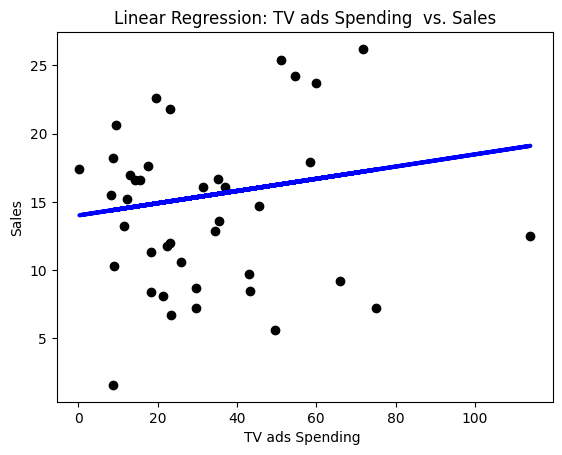

In [ ]:
plt.scatter(TV_test, S_test, color='black')
plt.plot(TV_test, S_pred, color='blue', linewidth=3)
plt.xlabel('TV ads Spending ')
plt.ylabel('Sales')
plt.title('Linear Regression: TV ads Spending  vs. Sales')
plt.show()


## Regression Results

In [ ]:
from sklearn import metrics

In [ ]:
print('Coefficients:', regressor.coef_)
print('Intercept:', regressor.intercept_)
print('Mean Absolute Error:', metrics.mean_absolute_error(S_test, S_pred))
print('Mean Squared Error:', metrics.mean_squared_error(S_test, S_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(S_test, S_pred)))



Coefficients: [0.04469941]
Intercept: 14.009027446152578
Mean Absolute Error: 4.970765063598643
Mean Squared Error: 34.972705918316024
Root Mean Squared Error: 5.91377256227495


In [ ]:
r2= metrics.r2_score(S_test,S_pred)
r2

-0.04777401704458972

### Multiple Linear Regression

In [ ]:
regressor_multi = LinearRegression()
regressor_multi.fit(X_train, y_train)
y_pred_multi = regressor_multi.predict(X_test)

## Regression Results

In [ ]:
print('Coefficients:', regressor_multi.coef_)
print('Intercept:', regressor_multi.intercept_)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_multi))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_multi))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_multi)))

Coefficients: [ 0.05368006  0.11152624 -0.00351166]
Intercept: 4.7732052032698284
Mean Absolute Error: 1.417031303060066
Mean Squared Error: 4.522552562041287
Root Mean Squared Error: 2.126629389912894
